In [14]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score


## Using Decision Tree and Random Forest for Digits Classification
Remember the MNIST dataset used in the Classification Exercise - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model hyperparameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).

**Questions:**

**1.** Choose which model hyperparameters (2-3) you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest. **DO NOT forget to create a validation set for this experiment**


Model Hyperparameters Optimization:

For a single decision tree:
        Max depth of the tree: I would optimize this hyperparameter to prevent overfitting by experimenting with different depths and selecting the one that maximizes performance on the validation set.
        
For Random Forest:
        Number of trees: I would experiment with different numbers of trees in the forest to find the optimal balance between model complexity and performance.
I will loop over the range of parameters and every time train another model, and print the score to see which is the best Hyperparameter.

In [15]:
mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = mnist
print(X.shape)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)


In [16]:
max_depth_values = range(1, 21)

for max_depth in max_depth_values:
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_classifier.fit(X_train_temp, y_train_temp)
    val_score = dt_classifier.score(X_val, y_val)
    print(f"Max Depth: {max_depth}, Validation Score: {val_score:.3f}")


Max Depth: 1, Validation Score: 0.203
Max Depth: 2, Validation Score: 0.331
Max Depth: 3, Validation Score: 0.436
Max Depth: 4, Validation Score: 0.560
Max Depth: 5, Validation Score: 0.648
Max Depth: 6, Validation Score: 0.723
Max Depth: 7, Validation Score: 0.770
Max Depth: 8, Validation Score: 0.806
Max Depth: 9, Validation Score: 0.839
Max Depth: 10, Validation Score: 0.859
Max Depth: 11, Validation Score: 0.866
Max Depth: 12, Validation Score: 0.870
Max Depth: 13, Validation Score: 0.873
Max Depth: 14, Validation Score: 0.875
Max Depth: 15, Validation Score: 0.877
Max Depth: 16, Validation Score: 0.875
Max Depth: 17, Validation Score: 0.876
Max Depth: 18, Validation Score: 0.875
Max Depth: 19, Validation Score: 0.874
Max Depth: 20, Validation Score: 0.873


We can see that the best value is max_depth = 15 with a validation score of 0.877

let's do the same for the RF :

In [17]:
n_estimators_values = range(10, 201, 10)

for n_estimators in n_estimators_values:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train_temp, y_train_temp)
    val_score = rf_classifier.score(X_val, y_val)
    print(f"Number of Trees: {n_estimators}, Validation Score: {val_score:.3f}")


Number of Trees: 10, Validation Score: 0.944
Number of Trees: 20, Validation Score: 0.956
Number of Trees: 30, Validation Score: 0.962
Number of Trees: 40, Validation Score: 0.963
Number of Trees: 50, Validation Score: 0.965
Number of Trees: 60, Validation Score: 0.966
Number of Trees: 70, Validation Score: 0.966
Number of Trees: 80, Validation Score: 0.967
Number of Trees: 90, Validation Score: 0.966
Number of Trees: 100, Validation Score: 0.967
Number of Trees: 110, Validation Score: 0.967
Number of Trees: 120, Validation Score: 0.967
Number of Trees: 130, Validation Score: 0.967
Number of Trees: 140, Validation Score: 0.967
Number of Trees: 150, Validation Score: 0.967
Number of Trees: 160, Validation Score: 0.967
Number of Trees: 170, Validation Score: 0.967
Number of Trees: 180, Validation Score: 0.967
Number of Trees: 190, Validation Score: 0.967
Number of Trees: 200, Validation Score: 0.967


We can see that we obtained better scores than a single tree algorithm, the best n_estimators value is 80 (convergence at 80) with a validation score of 0.978

**2.** Once you are satisfied with the model hyperparameters, plot for each of the models (a single decision tree and random forest) the importance of each of the pixels to the final decision. The end result should be an image that looks like a heatmap, that shows the most important pixels in the decision. **Explain the result**


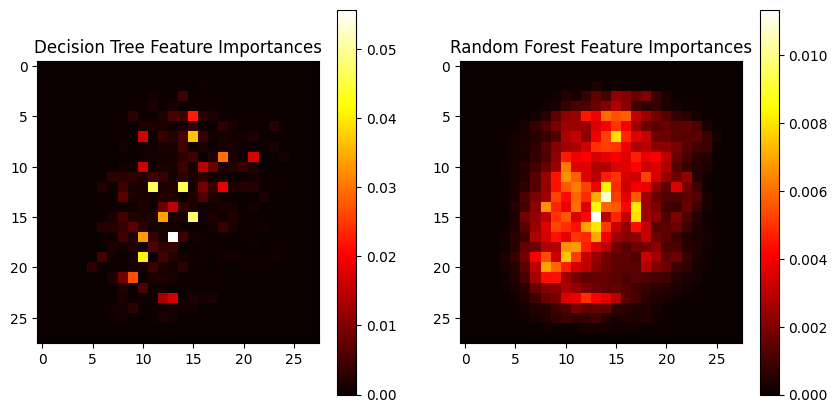

In [18]:
dt_classifier = DecisionTreeClassifier(max_depth=15, random_state=42)
dt_classifier.fit(X_train_temp, y_train_temp)

rf_classifier = RandomForestClassifier(n_estimators=80, random_state=42)
rf_classifier.fit(X_train_temp, y_train_temp)

# Get feature importances for both models
dt_importances = dt_classifier.feature_importances_
rf_importances = rf_classifier.feature_importances_

# Reshape feature importances to match the original image size (8x8 pixels)
dt_importances_image = dt_importances.reshape(28, 28)
rf_importances_image = rf_importances.reshape(28, 28)

# Plot feature importances for the Decision Tree
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dt_importances_image, cmap='hot', interpolation='nearest')
plt.title('Decision Tree Feature Importances')
plt.colorbar()

# Plot feature importances for the Random Forest
plt.subplot(1, 2, 2)
plt.imshow(rf_importances_image, cmap='hot', interpolation='nearest')
plt.title('Random Forest Feature Importances')
plt.colorbar()

plt.show()


We can see that the pixels that are more on the edges are less important and the pixels in the center are the interesting ones because most of the time they are the ones that define the number.

**3.** Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
Print, regardless of the digit, the mean +- std for the correctly classified samples, and the mean +- std for the misclassified samples.

*The end result should look like:*

Error class probability: mean_proba (+/- std_proba)
Correct class probability: mean_proba (+/- std_proba)



In [19]:
dt_pred = dt_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)

dt_pred_proba = dt_classifier.predict_proba(X_test)
rf_pred_proba = rf_classifier.predict_proba(X_test)


dt_correct_proba = dt_pred_proba[dt_pred == y_test]
rf_correct_proba = rf_pred_proba[rf_pred == y_test]

dt_misclassified_proba = dt_pred_proba[dt_pred != y_test]
rf_misclassified_proba = rf_pred_proba[rf_pred != y_test]


print("Decision Tree:")
print(f"Error class probability: {np.mean(dt_misclassified_proba):.3f} (+/- {np.std(dt_misclassified_proba):.3f})")
print(f"Correct class probability: {np.mean(dt_correct_proba):.3f} (+/- {np.std(dt_correct_proba):.3f})")

print("\nRandom Forest:")
print(f"Error class probability: {np.mean(rf_misclassified_proba):.3f} (+/- {np.std(rf_misclassified_proba):.3f})")
print(f"Correct class probability: {np.mean(rf_correct_proba):.3f} (+/- {np.std(rf_correct_proba):.3f})")


Decision Tree:
Error class probability: 0.100 (+/- 0.294)
Correct class probability: 0.100 (+/- 0.296)

Random Forest:
Error class probability: 0.100 (+/- 0.134)
Correct class probability: 0.100 (+/- 0.252)


**4.** Discuss your results.

We can see that we obtained exactly the same mean values for both sets and for both the correct and misclssified